In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\lenovo\Downloads\Resume Dataset\UpdatedResumeDataSet.csv')

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

## Exploring Categories

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

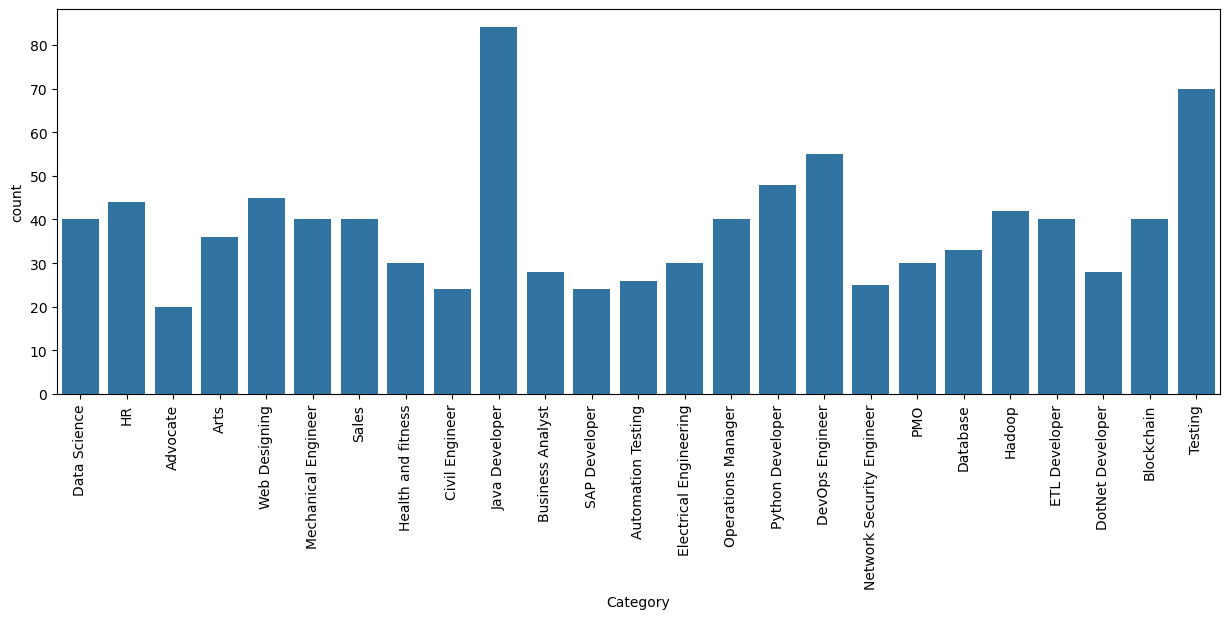

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.show()

In [9]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

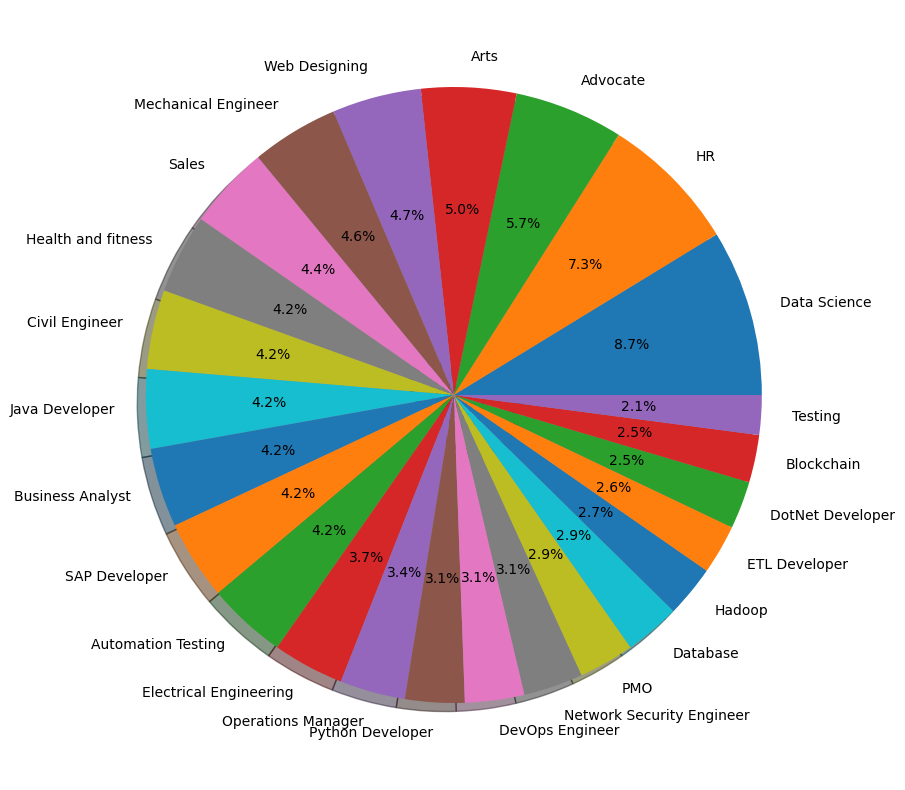

In [10]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

In [11]:
labels

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [12]:
df['Category'][100]

'Advocate'

In [13]:
df['Resume'][100]

'Skills: Natural Languages: Proficient in English, Hindi and Marathi. Computer skills: Proficient with MS-Office, Internet operation.Education Details \r\nJanuary 2015 to January 2018 LLB Law Mumbai, Maharashtra Mumbai university\r\nJanuary 2015 B.M.M  Mumbai, Maharashtra S.K.Somaiya College, Mumbai University\r\n H.S.C   Asmita Girls junior College, Maharashtra Board\r\n S.S.C Vidya Bhawan  Maharashtra Board\r\nAdvocate \r\n\r\nLlb student and Journalist\r\nSkill Details \r\nCompany Details \r\ncompany - Criminal lawyer (law firm)\r\ndescription - '

## Cleaning Data:

In [15]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [16]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [17]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [18]:
df['Resume'][100]

'Skills Natural Languages Proficient in English Hindi and Marathi Computer skills Proficient with MS Office Internet operation Education Details January 2015 to January 2018 LLB Law Mumbai Maharashtra Mumbai university January 2015 B M M Mumbai Maharashtra S K Somaiya College Mumbai University H S C Asmita Girls junior College Maharashtra Board S S C Vidya Bhawan Maharashtra Board Advocate Llb student and Journalist Skill Details Company Details company Criminal lawyer law firm description '

## words into categorical values

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [22]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Vactorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

## Splitting

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [28]:
x_train.shape

(769, 7351)

In [29]:
x_test.shape

(193, 7351)

## Now let’s train the model and print the classification report:

In [31]:
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score,confusion_matrix

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.99
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00    

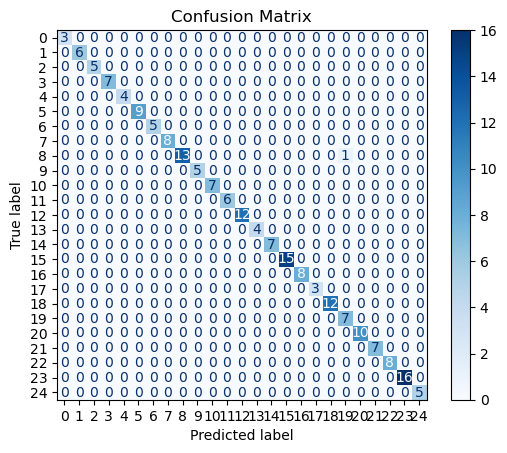

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming the model is already trained
# Predicting on the test set
y_pred = model_NB.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

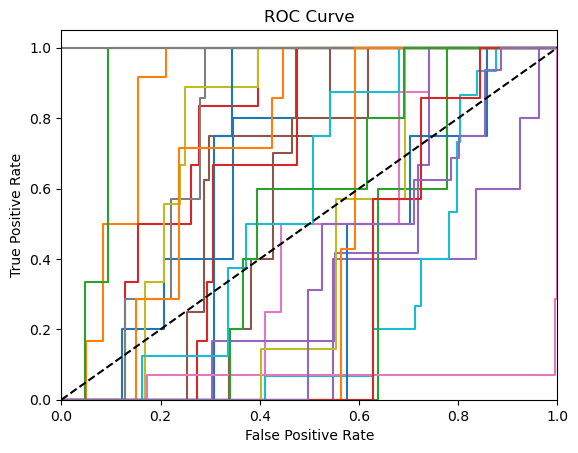

In [84]:
# roc curve and auc
# Import necessary libraries
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# If your model is a multiclass classifier
# Convert the test labels to a binary format if necessary
y_test_bin = label_binarize(y_test, classes=[*df['Category'].unique()])
n_classes = y_test_bin.shape[1]

# Train a one-vs-rest classifier (if needed for multiclass ROC curve)
classifier = OneVsRestClassifier(model_NB)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [33]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])